## Web Coverage Service : Example using Python Client : OWSLib 

In [1]:
%matplotlib inline
# Import WCS from owslib
from owslib.wcs import WebCoverageService
import matplotlib.pyplot as plt
from osgeo import gdal

### Access ECCC Geomet data : 
* With WCS we want to access the data not just a map

In [2]:
wcs_url = 'http://geo.weather.gc.ca/geomet/?lang=en&service=WCS'

# connection
wcs = WebCoverageService(wcs_url,version='1.0.0')
print(wcs.identification.title)

Meteorological Service of Canada Geospatial Web Services 2.0.6


#### 1 - Let's list some of the contents : 

In [3]:
# List some metadata
for c in wcs.contents:
    print(c)



HRDPA.6F_PR
HRDPA.6P_PR
HRDPA.24F_PR
HRDPA.24P_PR
HRDPS.CONTINENTAL.PRES_ES.50
HRDPS.CONTINENTAL.PRES_ES.100
HRDPS.CONTINENTAL.PRES_ES.150
HRDPS.CONTINENTAL.PRES_ES.175
HRDPS.CONTINENTAL.PRES_ES.200
HRDPS.CONTINENTAL.PRES_ES.225
HRDPS.CONTINENTAL.PRES_ES.250
HRDPS.CONTINENTAL.PRES_ES.275
HRDPS.CONTINENTAL.PRES_ES.300
HRDPS.CONTINENTAL.PRES_ES.350
HRDPS.CONTINENTAL.PRES_ES.400
HRDPS.CONTINENTAL.PRES_ES.450
HRDPS.CONTINENTAL.PRES_ES.500
HRDPS.CONTINENTAL.PRES_ES.550
HRDPS.CONTINENTAL.PRES_ES.600
HRDPS.CONTINENTAL.PRES_ES.650
HRDPS.CONTINENTAL.PRES_ES.700
HRDPS.CONTINENTAL.PRES_ES.750
HRDPS.CONTINENTAL.PRES_ES.800
HRDPS.CONTINENTAL.PRES_ES.850
HRDPS.CONTINENTAL.PRES_ES.875
HRDPS.CONTINENTAL.PRES_ES.900
HRDPS.CONTINENTAL.PRES_ES.925
HRDPS.CONTINENTAL.PRES_ES.950
HRDPS.CONTINENTAL.PRES_ES.970
HRDPS.CONTINENTAL.PRES_ES.985
HRDPS.CONTINENTAL.PRES_ES.1000
HRDPS.CONTINENTAL.PRES_ES.1015
HRDPS.CONTINENTAL.PRES_GZ.50
HRDPS.CONTINENTAL.PRES_GZ.100
HRDPS.CONTINENTAL.PRES_GZ.200
HRDPS.CONTINENTAL.PR

REPS.DIAG.24_T8.ERGE-30
REPS.DIAG.24_T8.ERMEAN
REPS.DIAG.24_WCF.ERC0
REPS.DIAG.24_WCF.ERC10
REPS.DIAG.24_WCF.ERC25
REPS.DIAG.24_WCF.ERC50
REPS.DIAG.24_WCF.ERC75
REPS.DIAG.24_WCF.ERC90
REPS.DIAG.24_WCF.ERC100
REPS.DIAG.24_WCF.ERGE0
REPS.DIAG.24_WCF.ERGE5
REPS.DIAG.24_WCF.ERGE10
REPS.DIAG.24_WCF.ERGE15
REPS.DIAG.24_WCF.ERGE20
REPS.DIAG.24_WCF.ERGE25
REPS.DIAG.24_WCF.ERGE30
REPS.DIAG.24_WCF.ERGE35
REPS.DIAG.24_WCF.ERGE40
REPS.DIAG.24_WCF.ERGE45
REPS.DIAG.24_WCF.ERGE50
REPS.DIAG.24_WCF.ERMEAN
REPS.DIAG.24_WCF.ERSSTD
REPS.DIAG.48_PRMM.ERC10
REPS.DIAG.48_PRMM.ERC25
REPS.DIAG.48_PRMM.ERC50
REPS.DIAG.48_PRMM.ERC75
REPS.DIAG.48_PRMM.ERC90
REPS.DIAG.48_PRMM.ERGE1
REPS.DIAG.48_PRMM.ERGE2.5
REPS.DIAG.48_PRMM.ERGE5
REPS.DIAG.48_PRMM.ERGE10
REPS.DIAG.48_PRMM.ERGE15
REPS.DIAG.48_PRMM.ERGE20
REPS.DIAG.48_PRMM.ERGE25
REPS.DIAG.48_PRMM.ERGE30
REPS.DIAG.48_PRMM.ERGE40
REPS.DIAG.48_PRMM.ERGE50
REPS.DIAG.48_PRMM.ERGE75
REPS.DIAG.48_PRMM.ERGE100
REPS.DIAG.48_PRMM.ERGE150
REPS.DIAG.48_PRMM.ERGE200
REPS.DIAG.

#### 2 - Let's try to get some data

In [4]:
layerid = 'OCEAN.GIOPS.3D_SALW_0000'
temp = wcs[layerid]
#Title
print('Layer title :', temp.title)
#bounding box
print('BoundingBox :', temp.boundingBoxWGS84)
# supported data formats - we'll use geotiff
print('Formats :', temp.supportedFormats)
#grid dimensions
print('Grid upper limits :', temp.grid.highlimits)

Layer title : OCEAN.GIOPS.3D - Sea water salinity - 0000m
BoundingBox : (-180.0, -80.1, 180.0, 89.9)
Formats : ['GEOTIFF_16', 'AAIGRID']
Grid upper limits : ['1799', '849']


#### 3 - Create WCS inputs

In [5]:
format_wcs = temp.supportedFormats[0]
print(format_wcs)
bbox_wcs = temp.boundingboxes[0]['bbox'] # Get the entire domain
print(bbox_wcs)
crs_wcs = temp.boundingboxes[0]['nativeSrs'] # Coordinate system
print(crs_wcs)
w = int(temp.grid.highlimits[0] )
print(w)
h = int(temp.grid.highlimits[1])
print(h)

GEOTIFF_16
(-180.0, -80.1, 180.0, 89.9)
EPSG:4326
1799
849


#### 4 - Request and download the data via WCS

In [6]:
output=wcs.getCoverage(identifier=layerid,crs=crs_wcs,bbox=bbox_wcs,
                       width=w,height=h,format=format_wcs)
out_tiff = './output/' + layerid + '.tiff'
f=open(out_tiff,'wb')
f.write(output.read())
f.close()


#### 5 - Load and display the data

./output/OCEAN.GIOPS.3D_SALW_0000.tiff
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fd13b305e70> >


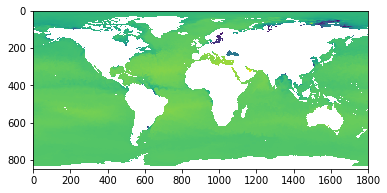

In [7]:
print(out_tiff)
ds = gdal.Open(out_tiff)
print(ds)
arr = ds.ReadAsArray()
arr[arr==0]='nan'
#print(ds)
plt.imshow(arr) #Not working - inline option unavailable?

#### Map is nice but big difference is values are floating point!

[ 30.50195312  30.50195312  30.50195312 ...,  34.12597656  34.12695312
  34.12402344]


(array([  8.46000000e+02,   1.91300000e+03,   1.41100000e+03,
          3.15100000e+03,   4.00100000e+03,   1.14680000e+04,
          1.73244000e+05,   8.47162000e+05,   1.76100000e+04,
          1.88000000e+02]),
 array([  0.28808594,   4.91796875,   9.54785156,  14.17773438,
         18.80761719,  23.4375    ,  28.06738281,  32.69726562,
         37.32714844,  41.95703125,  46.58691406]),
 <a list of 10 Patch objects>)

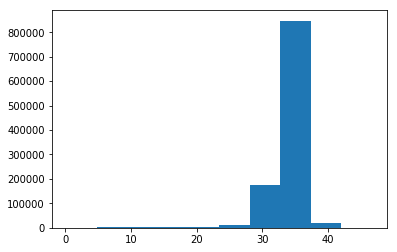

In [12]:
import numpy as np
print(arr[~np.isnan(arr)])
plt.hist(arr[~np.isnan(arr)])